In [1]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key='ab2882f6485e2828c46882b863cc7c8cdaaef007')
df.head()

C:\Users\sinch\AppData\Local\Temp\ipykernel_3460\918027198.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key='ab2882f6485e2828c46882b863cc7c8cdaaef007')


close    high      low    open    volume  \
symbol date                                                                   
AAPL   2017-12-11 00:00:00+00:00  172.67  172.89  168.790  169.20  33092051   
       2017-12-12 00:00:00+00:00  171.70  172.39  171.461  172.15  18945457   
       2017-12-13 00:00:00+00:00  172.27  173.54  172.000  172.50  23142242   
       2017-12-14 00:00:00+00:00  172.22  173.13  171.650  172.40  20219307   
       2017-12-15 00:00:00+00:00  173.97  174.17  172.460  173.63  37054632   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-12-11 00:00:00+00:00  41.046071  41.098368  40.123740  40.221203   
       2017-12-12 00:00:00+00:00  40.815488  40.979511  40.758674  40.922459   
       2017-12-13 00:00:00+00:00  40.950985  41.252882  40.886802  41.005659   
       2017-12-14 00:00:00+00:00  40.939099  41.155419  40.803602  40.981888   
       2017-12-15 00:00:00+00:00  41.355099  41.402642  40.996151  41.274276   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-12-11 00:00:00+00:00  132368204      0.0          1.0  
       2017-12-12 00:00:00+00:00   75781828      0.0          1.0  
       2017-12-13 00:00:00+00:00   92568968      0.0          1.0  
       2017-12-14 00:00:00+00:00   80877228      0.0          1.0  
       2017-12-15 00:00:00+00:00  148218528      0.0          1.0

In [3]:
df.tail()

close      high     low     open    volume  \
symbol date                                                                     
AAPL   2022-12-02 00:00:00+00:00  147.81  148.0000  145.65  145.960  65447446   
       2022-12-05 00:00:00+00:00  146.63  150.9199  145.77  147.770  68826442   
       2022-12-06 00:00:00+00:00  142.91  147.3000  141.92  147.075  64727186   
       2022-12-07 00:00:00+00:00  140.94  143.3700  140.00  142.190  69721094   
       2022-12-08 00:00:00+00:00  142.65  143.5200  141.10  142.360  62128338   

                                  adjClose   adjHigh  adjLow  adjOpen  \
symbol date                                                             
AAPL   2022-12-02 00:00:00+00:00    147.81  148.0000  145.65  145.960   
       2022-12-05 00:00:00+00:00    146.63  150.9199  145.77  147.770   
       2022-12-06 00:00:00+00:00    142.91  147.3000  141.92  147.075   
       2022-12-07 00:00:00+00:00    140.94  143.3700  140.00  142.190   
       2022-12-08 00:00:00+00:00    142.65  143.5200  141.10  142.360   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2022-12-02 00:00:00+00:00   65447446      0.0          1.0  
       2022-12-05 00:00:00+00:00   68826442      0.0          1.0  
       2022-12-06 00:00:00+00:00   64727186      0.0          1.0  
       2022-12-07 00:00:00+00:00   69721094      0.0          1.0  
       2022-12-08 00:00:00+00:00   62128338      0.0          1.0

In [4]:
df1 = df.reset_index()['close']
df1.head()

0    172.67
1    171.70
2    172.27
3    172.22
4    173.97
Name: close, dtype: float64

In [5]:
df1.shape

(1258,)

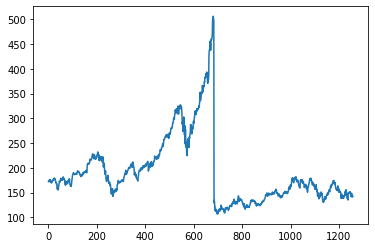

In [6]:
plt.plot(df1)

In [7]:
import numpy as np 
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(1258, 1)

In [9]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [10]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
X_train

array([[0.16488416, 0.1624546 , 0.16388228, ..., 0.17465247, 0.17545398,
        0.19283657],
       [0.1624546 , 0.16388228, 0.16375704, ..., 0.17545398, 0.19283657,
        0.19616781],
       [0.16388228, 0.16375704, 0.16814026, ..., 0.19283657, 0.19616781,
        0.19839699],
       ...,
       [0.04398247, 0.03571697, 0.03594239, ..., 0.03812148, 0.03328741,
        0.03651847],
       [0.03571697, 0.03594239, 0.03474014, ..., 0.03328741, 0.03651847,
        0.02384471],
       [0.03594239, 0.03474014, 0.0305072 , ..., 0.03651847, 0.02384471,
        0.0356794 ]])

In [12]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 17s 545ms/step - loss: 0.0385 - val_loss: 0.0012
Epoch 2/100
12/12 [==============================] - 4s 328ms/step - loss: 0.0162 - val_loss: 0.0058
Epoch 3/100
12/12 [==============================] - 4s 312ms/step - loss: 0.0108 - val_loss: 4.6798e-04
Epoch 4/100
12/12 [==============================] - 4s 323ms/step - loss: 0.0085 - val_loss: 5.3029e-04
Epoch 5/100
12/12 [==============================] - 4s 314ms/step - loss: 0.0078 - val_loss: 3.1007e-04
Epoch 6/100
12/12 [==============================] - 4s 313ms/step - loss: 0.0078 - val_loss: 6.8088e-04
Epoch 7/100
12/12 [==============================] - 4s 322ms/step - loss: 0.0065 - val_loss: 4.6872e-04
Epoch 8/100
12/12 [==============================] - 4s 324ms/step - loss: 0.0059 - val_loss: 4.3006e-04
Epoch 9/100
12/12 [==============================] - 4s 310ms/step - loss: 0.0063 - val_loss: 2.6570e-04
Epoch 10/100
12/12 [==============================] - 4s 313ms

In [17]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 1s 69ms/step


In [18]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [19]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

231.75945361570487

In [20]:
math.sqrt(mean_squared_error(y_test, test_predict))

156.3093352986375

In [21]:
mse = mean_squared_error(y_test, test_predict)
mse**0.5

156.3093352986375

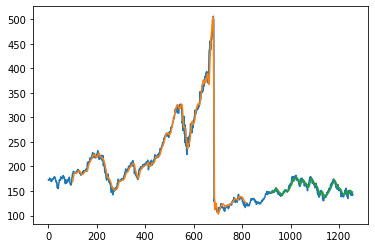

In [22]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [23]:
len(test_data)

441

In [24]:
x_input = test_data[341:].reshape(1, -1)
x_input.shape

(1, 100)

In [25]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [26]:
from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input)>100:
        x_input = array(temp_input[1:])
        print(f'{i} day input {x_input}')
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(f'{i} day output {yhat}')
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)

[0.09941763]
101
1 day input [0.12150282 0.1183469  0.11549155 0.11211021 0.12510958 0.12651221
 0.13943644 0.13693175 0.1331747  0.14850344 0.14770194 0.14654978
 0.14534753 0.14547276 0.15629305 0.15441453 0.16345648 0.1661866
 0.16578585 0.16959299 0.16859111 0.16200376 0.15211021 0.15125861
 0.15201002 0.15827176 0.14221666 0.13660614 0.13041954 0.1261866
 0.12804008 0.12265498 0.11944897 0.12303068 0.11927364 0.1265623
 0.14174076 0.11772073 0.12140263 0.11403882 0.10985598 0.11932373
 0.1253851  0.11742016 0.11496556 0.10917971 0.11003131 0.11251096
 0.10770194 0.08926738 0.07854728 0.08919224 0.09833438 0.09908579
 0.09665623 0.08328115 0.0841077  0.08050094 0.07889793 0.09054477
 0.07899812 0.08909205 0.09244834 0.09272386 0.09154665 0.10126487
 0.10672511 0.11396368 0.10647464 0.09507827 0.12247965 0.11646838
 0.10973075 0.09565435 0.08025047 0.07899812 0.08035066 0.08180338
 0.07020664 0.10026299 0.10735128 0.10379461 0.10820288 0.10507201
 0.10990607 0.11133375 0.10311835 0.

In [27]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [28]:
df2 = df1.tolist()
df2.extend(lst_output)

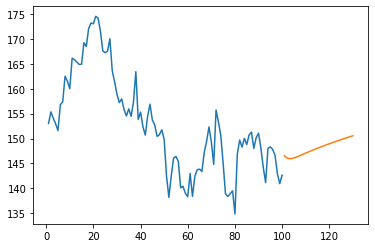

In [29]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

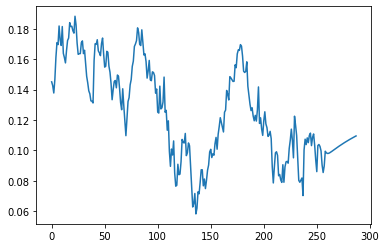

In [30]:
plt.plot(df2[1000:])

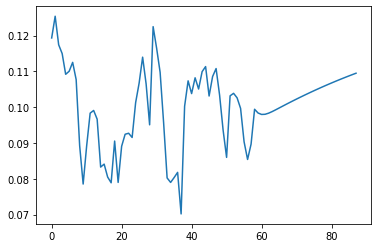

In [31]:
plt.plot(df2[1200:])